In [1]:
from Extractor import WaterExtractor
import mdtraj as md
import pickle
from utils_carl import get_mdfps
from scipy.stats import ks_2samp


In [2]:
df_one =get_mdfps("one_5ns")
df_many =get_mdfps("five_5ns")
molregnos = df_one["molregno"].unique()
molregnos = molregnos.tolist()
confids_one,confids_many = [],[]
for m in molregnos:
    one_confid = df_one[df_one["molregno"]==m]["confid"].unique()
    if len(one_confid) == 1:
        one_confid = one_confid[0]
    else:
        print("error")
    many_confid = df_many[df_many["molregno"]==m]["confid"].unique()
    confids_one.append(one_confid.tolist())
    confids_many.append(many_confid.tolist())
print(len(confids_one),len(confids_many))

2993 results fetched
['confid', 'molregno', 'mdfp', 'vp_log10pa']
11089 results fetched
['confid', 'molregno', 'mdfp', 'vp_log10pa']
2993 2993


In [3]:
df_many

,confid,molregno,mdfp,vp
0,5913,3831,"[11, 0, 1, 1, 0, 0, 0, 0, 0, 0, -320.430381442...",-0.585027
1,5896,3076,"[14, 5, 0, 1, 0, 0, 0, 0, 0, 0, -115.251545263...",0.407731
2,5895,3076,"[14, 5, 0, 1, 0, 0, 0, 0, 0, 0, -117.147659466...",0.407731
3,5893,3076,"[14, 5, 0, 1, 0, 0, 0, 0, 0, 0, -116.017171549...",0.407731
4,5927,81,"[7, 2, 0, 0, 0, 0, 0, 0, 0, 0, -14.28893324539...",4.100000
...,...,...,...,...
11084,15530,3539,"[44, 35, 2, 4, 0, 0, 0, 0, 0, 0, -285.66340740...",-4.000000
11085,15531,3539,"[44, 35, 2, 4, 0, 0, 0, 0, 0, 0, -287.85335624...",-4.000000
11086,15529,3539,"[44, 35, 2, 4, 0, 0, 0, 0, 0, 0, -286.74305751...",-4.000000
11087,15532,3539,"[44, 35, 2, 4, 0, 0, 0, 0, 0, 0, -284.52836303...",-4.000000


In [4]:
#save both to pickle
with open("confids_one.pickle","wb") as f:
    pickle.dump(confids_one,f)
with open("confids_many.pickle","wb") as f:
    pickle.dump(confids_many,f)
    #and load
with open("confids_one.pickle","rb") as f:
    confids_one = pickle.load(f)
with open("confids_many.pickle","rb") as f:
    confids_many = pickle.load(f)
    

In [5]:
def get_distributions(confid):
    traj = md.load(f"data/trajectories/{confid}.h5")
    rdk_pmd = pickle.load(open(f"data/topologies/{confid}.pickle", "rb"))
    energie_dict = WaterExtractor.extract_energies(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    rgyr_dict = WaterExtractor.extract_rgyr(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    sasa_dict = WaterExtractor.extract_sasa(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    water_rgyr = rgyr_dict["water_rgyr"]
    water_sasa = sasa_dict["water_sasa"]
    water_sasa = [item for sublist in water_sasa for item in sublist]
    water_intra_crf = energie_dict["water_intra_crf"]
    water_intra_lj = energie_dict["water_intra_lj"]
    water_total_crf = energie_dict["water_total_crf"]
    water_total_lj = energie_dict["water_total_lj"]
    water_intra_ene = energie_dict["water_intra_ene"]
    water_total_ene = energie_dict["water_total_ene"]

    return [water_rgyr,water_sasa,water_intra_crf,water_intra_lj,water_total_crf,water_total_lj,water_intra_ene,water_total_ene]    

In [6]:
def get_k2s_stats(nested_list1,nested_list2):
    stats = []
    for l1,l2 in zip(nested_list1,nested_list2):
        # print(len(l1),len(l2))
        # print(l1[:5],l2[:5])
        stat = ks_2samp(l1,l2)
        stats.append(stat)
    return stats


In [7]:
stats_lol = []
for ref_conf,test_confs in zip(confids_one,confids_many):
    alpha = 0.5/len(test_confs)
    nested_list_ref = get_distributions(ref_conf)
    for conf in test_confs:
        nested_list_test = get_distributions(conf)
        stats = get_k2s_stats(nested_list_ref,nested_list_test)
        stats_lol.append(stats)
#save as pickle
with open("stats_lol.pickle","wb") as f:
    pickle.dump(stats_lol,f)

OSError: No such file: data/trajectories/2388.h5

In [ ]:
stats_lol = []
ref_conf = 2668
test_confs = [5768,]
alpha = 0.5/len(test_confs)
nested_list_ref = get_distributions(ref_conf)
for conf in test_confs:
    nested_list_test = get_distributions(conf)
    # stats = get_k2s_stats(nested_list_ref,nested_list_test)
    # stats_lol.append(stats)

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [21]:
# stats = ks_2samp(nested_list_ref,nested_list_test)
print(len(nested_list_ref))

8


In [ ]:
stats

[KstestResult(statistic=0.056, pvalue=0.41348608403425674, statistic_location=0.2929216539534666, statistic_sign=-1),
 KstestResult(statistic=0.044, pvalue=0.7189191850204419, statistic_location=3.5050726, statistic_sign=1),
 KstestResult(statistic=0.048, pvalue=0.6126241113875229, statistic_location=0.7750667401049398, statistic_sign=-1),
 KstestResult(statistic=0.036, pvalue=0.9026912216773312, statistic_location=28.030213162521726, statistic_sign=1),
 KstestResult(statistic=0.058, pvalue=0.3699050405997647, statistic_location=-20.605117354109275, statistic_sign=-1),
 KstestResult(statistic=0.056, pvalue=0.41348608403425674, statistic_location=-42.2151861131113, statistic_sign=1),
 KstestResult(statistic=0.036, pvalue=0.9026912216773312, statistic_location=29.113245535027122, statistic_sign=1),
 KstestResult(statistic=0.032, pvalue=0.9603008958861495, statistic_location=-59.58857399033455, statistic_sign=-1)]

In [8]:
import glob
files = glob.glob('data/distribution_stats/*')
print(len(files))
molregnos_with_significant = []
molregnos_with_significant_bonferonni = []
molregnos_not_significant = []
molregno_to_ncfons = {}
pval_lol = []
for file in files:
    molregno = file.split("/")[-1].split(".")[0].split("_")[-1]
    #load the pickle
    with open(file,"rb") as f:
        stats = pickle.load(f)
    molregno_to_ncfons[molregno] = len(stats)
    pvals_l = []
    for stat in stats:
        pvals = [s.pvalue for s in stat]
        pvals_l.append(pvals)
        alpha_bonferonni = 0.05/len(pvals)
        significant_bonferonni = [pval < alpha_bonferonni for pval in pvals]
        significant = [pval < 0.05 for pval in pvals]
        if any(significant):
            molregnos_with_significant.append(molregno)    
        if any(significant_bonferonni):
            molregnos_with_significant_bonferonni.append(molregno)
        else:
            molregnos_not_significant.append(molregno)
    pval_lol.append(pvals_l)
        
print(len(set(molregnos_with_significant)),len(set(molregnos_with_significant_bonferonni)))

1812
1533 1221


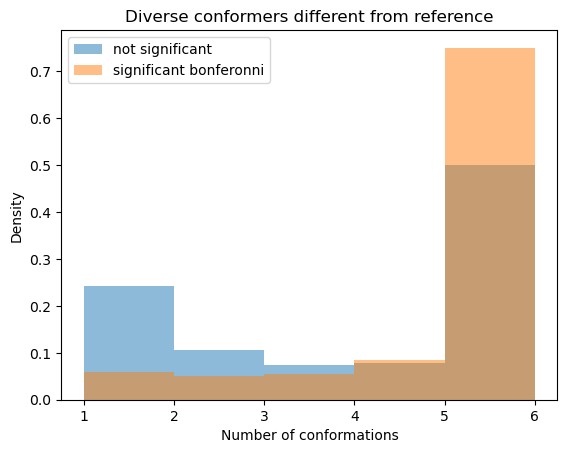

In [9]:
#but is this because of flexibility? lets look
molregnos_not_significant = list(set(molregnos_not_significant))
molregnos_with_significant = list(set(molregnos_with_significant))
molregnos_with_significant_bonferonni = list(set(molregnos_with_significant_bonferonni))
confs_not_significant = [molregno_to_ncfons[molregno] for molregno in molregnos_not_significant]
confs_significant = [molregno_to_ncfons[molregno] for molregno in molregnos_with_significant]
confs_significant_bonferonni = [molregno_to_ncfons[molregno] for molregno in molregnos_with_significant_bonferonni]
#plot these three in histogram
import matplotlib.pyplot as plt
import numpy as np
plt.hist(confs_not_significant,bins=np.arange(1,7,1),alpha=0.5,label="not significant",density=True)
# plt.hist(confs_significant,bins=np.arange(1,7,1),alpha=0.5,label="significant",density=True)
plt.hist(confs_significant_bonferonni,bins=np.arange(1,7,1),alpha=0.5,label="significant bonferonni",density=True)
plt.legend()
plt.xlabel("Number of conformations")
plt.ylabel("Density")
plt.title("Diverse conformers different from reference")
plt.show()

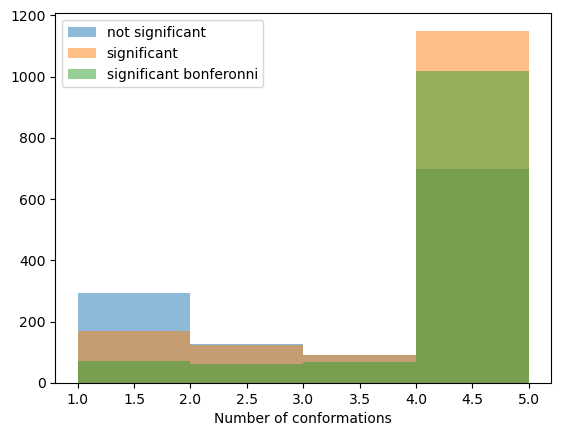

In [10]:
plt.hist(confs_not_significant,bins=np.arange(1,6,1),alpha=0.5,label="not significant")
plt.hist(confs_significant,bins=np.arange(1,6,1),alpha=0.5,label="significant")
plt.hist(confs_significant_bonferonni,bins=np.arange(1,6,1),alpha=0.5,label="significant bonferonni")
plt.xlabel("Number of conformations")
plt.legend()
plt.show()

In [ ]:
#lets look at the distributions manually for one of these with significant differences

In [ ]:
# molregno_to_look_at = int(molregnos_with_significant[0])
# molregno_to_look_at
# #get the one conf and the many confs
confid_one = confids_one[molregnos.index(molregno_to_look_at)]
confid_many = confids_many[molregnos.index(molregno_to_look_at)]

In [ ]:
molregno_to_look_at

411

In [12]:
molregno =411
with open("molregno_to_confid_one.pickle","rb") as f:
    molregno_to_confid_one = pickle.load(f)
with open("molregno_to_confid_many.pickle","rb") as f:
    molregno_to_confid_many = pickle.load(f)
    
def get_distributions(confid):
    traj = md.load(f"data/trajectories/{confid}.h5")
    rdk_pmd = pickle.load(open(f"data/topologies/{confid}.pickle", "rb"))
    energie_dict = WaterExtractor.extract_energies(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    rgyr_dict = WaterExtractor.extract_rgyr(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    sasa_dict = WaterExtractor.extract_sasa(mdtraj_obj=traj,parmed_obj=rdk_pmd)
    water_rgyr = rgyr_dict["water_rgyr"]
    water_sasa = sasa_dict["water_sasa"]
    water_sasa = [item for sublist in water_sasa for item in sublist]
    water_intra_crf = energie_dict["water_intra_crf"]
    water_intra_lj = energie_dict["water_intra_lj"]
    water_total_crf = energie_dict["water_total_crf"]
    water_total_lj = energie_dict["water_total_lj"]
    water_intra_ene = energie_dict["water_intra_ene"]
    water_total_ene = energie_dict["water_total_ene"]

    return [water_rgyr,water_sasa,water_intra_crf,water_intra_lj,water_total_crf,water_total_lj,water_intra_ene,water_total_ene]

ref_conf = molregno_to_confid_one[molregno]
test_confs = molregno_to_confid_many[molregno]
nested_list_ref = get_distributions(ref_conf)
stats_list = []
nested_list_nested = []
for conf in test_confs:
    nested_list_test = get_distributions(conf)
    nested_list_nested.append(nested_list_test)


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [13]:
for i1,lst in enumerate(nested_list_nested):
    stats = get_k2s_stats(nested_list_ref,lst)
    for i,stat in enumerate(stats):
        pval = stat.pvalue
        if pval < 0.05:
            print(pval,i,i1)
        


0.03479508043637821 4 0
0.03479508043637821 6 0
0.04950261174890187 7 1
0.01343088815558133 0 2
0.01637912818629415 2 2
0.008922221390371415 2 3
0.008922221390371415 6 3
0.005832082533064598 6 4


In [23]:
nested_list_ref[6]
nested_list_nested[4][6]
get_k2s_stats(nested_list_ref,nested_list_nested[4])
ks_2samp(nested_list_ref[6],nested_list_nested[4][6])

KstestResult(statistic=0.108, pvalue=0.005832082533064598, statistic_location=-34.009867478983736, statistic_sign=-1)

-33.34605110934061 -33.50453366213282
-33.55766706865411 -33.7626581359131
1.3742744664922486 1.4419941776952694


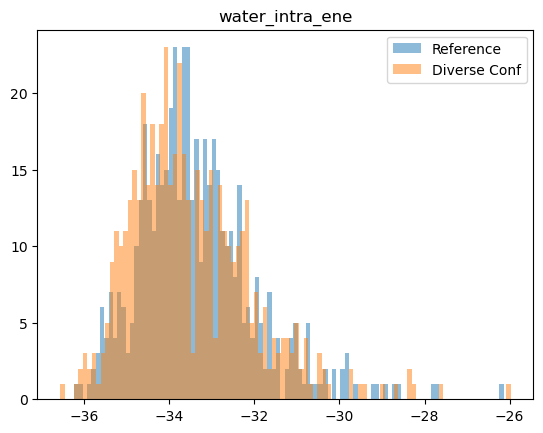

In [15]:
#okay so lets plot
plt.hist(nested_list_ref[6],bins=100,alpha=0.5,label="Reference")
plt.hist(nested_list_nested[4][6],bins=100,alpha=0.5,label="Diverse Conf")
#print means, medians, stds
print(np.mean(nested_list_ref[6]),np.mean(nested_list_nested[4][6]))
print(np.median(nested_list_ref[6]),np.median(nested_list_nested[4][6]))
print(np.std(nested_list_ref[6]),np.std(nested_list_nested[4][6]))
plt.title('water_intra_ene')
plt.legend()

-33.34605110934061 -33.34605110934061
-33.55766706865411 -33.55766706865411
1.3742744664922486 1.3742744664922486


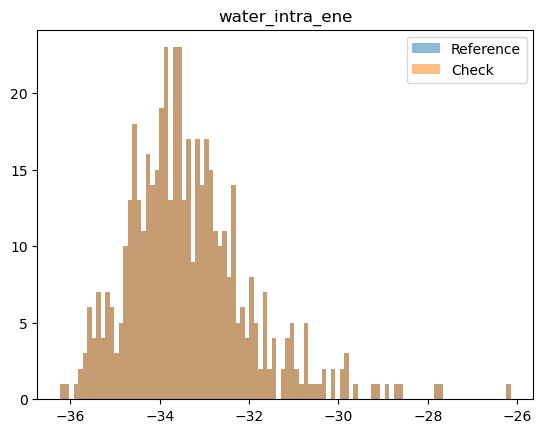

In [226]:

traj = md.load(f"data/trajectories/{confid_one}.h5")
rdk_pmd = pickle.load(open(f"data/topologies/{confid_one}.pickle", "rb"))
energie_dict = WaterExtractor.extract_energies(mdtraj_obj=traj,parmed_obj=rdk_pmd)
water_total_lj = energie_dict["water_intra_ene"]
#okay so lets plot
plt.hist(nested_list_ref[6],bins=100,alpha=0.5,label="Reference")
plt.hist(water_total_lj,bins=100,alpha=0.5,label="Check")
#print means, medians, stds
print(np.mean(nested_list_ref[6]),np.mean(water_total_lj))
print(np.median(nested_list_ref[6]),np.median(water_total_lj))
print(np.std(nested_list_ref[6]),np.std(water_total_lj))
plt.title('water_intra_ene')
plt.legend()

In [238]:
#eight subplots, all histograms with overlap of five distributions. subplot per property
dist_lists = []
for conf in range(7622,7627):
    print(conf)
    nested_list_test = get_distributions(conf)
    dist_lists.append(nested_list_test)

7622
7623
7624
7625
7626


In [240]:
nested_list_ref = get_distributions(3286)

In [241]:
dist_lists.append(nested_list_ref)

In [246]:
def avg_std(data):
    avg = np.mean(data)
    std = np.std(data)
    return str(round(avg,2))+'$\pm$'+str(round(std,2))

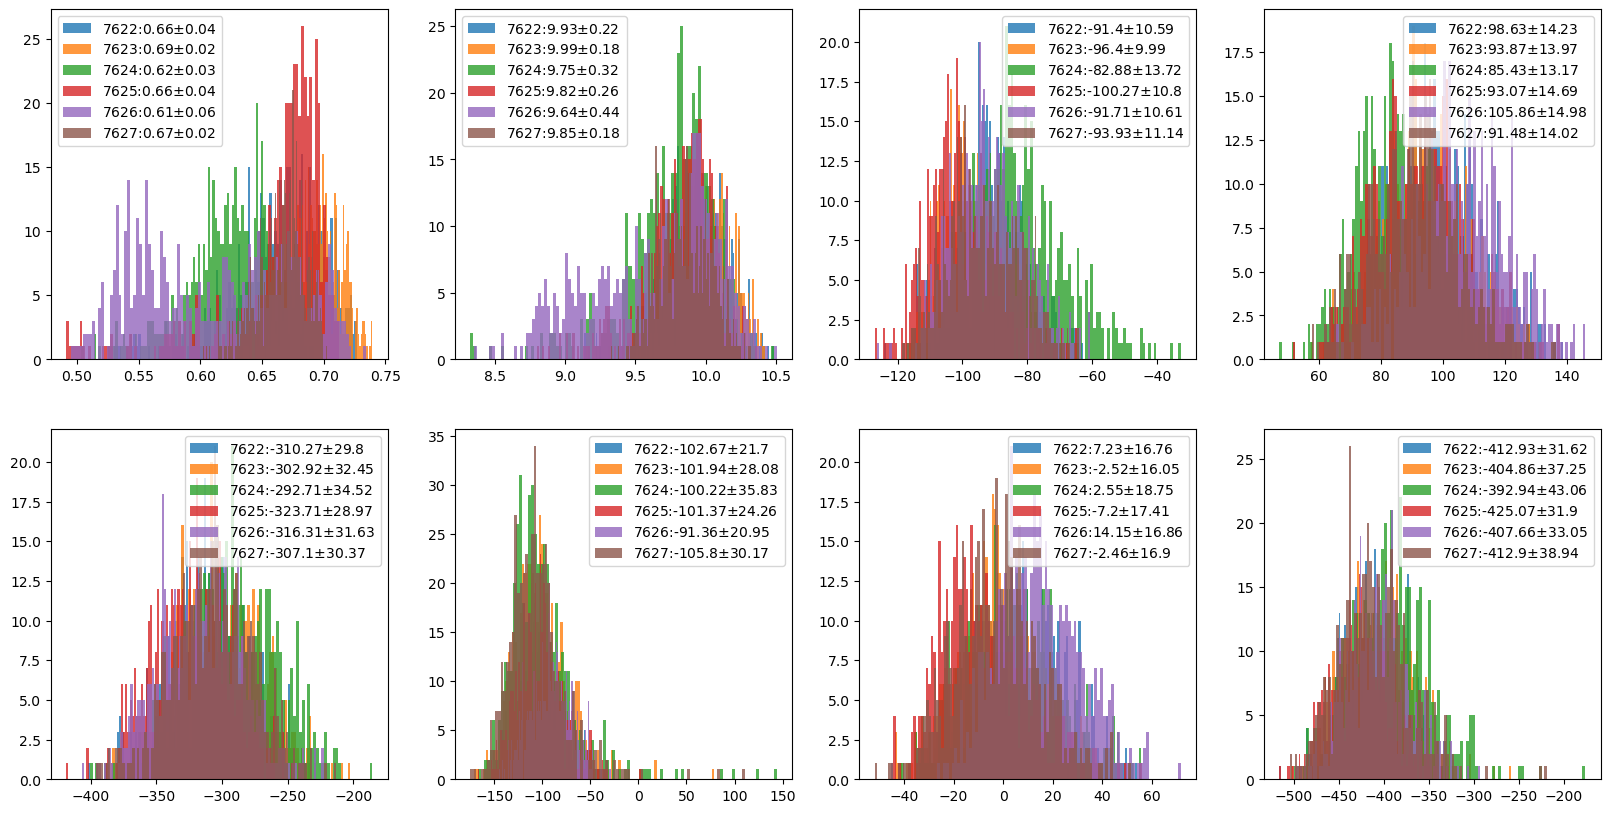

In [250]:
#dist_lists is a list of lists, each sublist is for one conformer. these sublists contain the distributions for each property
#lets plot them
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 4,figsize=(20,10))
axs = axs.ravel()
labels = ["water_rgyr","water_sasa","water_intra_crf","water_intra_lj","water_total_crf","water_total_lj","water_intra_ene","water_total_energy"]
for i,ax in enumerate(axs):
    for j in range(6):
        
        ax.hist(dist_lists[j][i],bins=100,alpha=0.8,label=str(7622+j)+':'+avg_std(dist_lists[j][i]))
        
    #ax.hist(dist_lists[1][i],bins=100,alpha=0.2,label="7623")
    #ax.hist(dist_lists[2][i],bins=100,alpha=0.2,label="7624")
    #ax.hist(dist_lists[3][i],bins=100,alpha=0.2,label="7625")
    #ax.hist(dist_lists[4][i],bins=100,alpha=0.2,label="7626")
    #ax.hist(dist_lists[5][i],bins=100,alpha=0.8,label="3286")
    #ax.set_title(f"{labels[i]}")
    ax.legend()